# 일차방정식 기울기 위에 것만 픽셀로 나타내기

In [7]:
pip install tqdm

     ---------------------------------------- 78.4/78.4 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'notebook')
import numpy as np
import csv
from tqdm import tqdm

In [70]:
df4 = pd.read_csv('coarse_fin2.csv')
df4

,x,y,z,I,r,g,b
0,-0.030,-5.670,-1.229,-2043,1,1,1
1,-0.091,-5.688,-1.190,-762,1,1,1
2,-0.111,-5.688,-1.168,-714,1,1,1
3,-0.091,-5.684,-1.168,-714,1,1,1
4,-0.069,-5.674,-1.165,-715,1,1,1
...,...,...,...,...,...,...,...
1212482,4.104,0.357,1.370,-550,1,1,1
1212483,4.104,0.354,1.374,-868,1,1,1
1212484,4.098,0.370,1.364,-596,1,1,1
1212485,4.101,0.386,1.296,-552,1,1,1


### 빈 배열 만들어주기 

In [71]:
def list_import(x):
    new_list = []
    for i in x:
        new_list.append(i)
        
    return new_list

### csv에서 방정식에 쓸 x,y 데이터 뽑아내기 

In [72]:
x = df4['x']
y = df4['y']

x_list = list_import(x)
y_list = list_import(y)

In [73]:
print(x_list[0:10])

[-0.03, -0.091, -0.111, -0.091, -0.069, -0.05, -0.03, -0.011, -0.207, -0.226]


### 일차방정식 : y = 2235/3524 * x +2.235 

In [74]:
cond = 2235/3524 * x + 2.235
print(cond[0:10])

0    2.215973
1    2.177286
2    2.164601
3    2.177286
4    2.191239
5    2.203289
6    2.215973
7    2.228024
8    2.103716
9    2.091666
Name: x, dtype: float64


### 조건에 해당하는 y값의 인덱스만 가져오기 

In [75]:
y_index = np.where(y>cond)
print(y_index[0])   #값만 나오게 하기

[  21968   21970   21972 ... 1196071 1207744 1207745]


In [76]:
for i in y_index[0]:
    print(i)

21968
21970
21972
21974
21975
21988
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22618
22619
22622
22623
22625
22626
22627
22628
22629
22630
22643
22644
22645
22647
22648
22649
22650
22652
22714
22716
22717
22720
22721
22722
22733
22735
22736
22737
22739
22740
22741
22742
22743
22746
22816
22818
22819
22820
22821
22823
22824
22825
22835
22837
22838
22839
22840
22841
22842
22844
22845
22846
22847
22848
22849
22850
22913
22914
22915
22916
22918
22922
22923
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
35185
35192
35199
35200
35201
35202
35203
35204
35205
35208
35209
35210
35211
35212
35213
35214
35215
35235
35236
35284
35285
35291
35292
35306
35307
35313
35314
35356
35357
35359
35360
35366
35367
35383
35384
35389
35390
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
3545

### 해당 인덱스에 대한 x,y,z,r,g,b 데이터 가져오기 

In [77]:
export_data = []
for i in y_index[0]:
    export_data.append(df4.loc[i])

In [78]:
print(export_data[0])

x      -3.575
y      -0.029
z      -1.323
I   -1376.000
r       1.000
g       1.000
b       1.000
Name: 21968, dtype: float64


### 데이터 프레임으로 전환 

In [80]:
df = pd.DataFrame(export_data, columns=['x','y','z','r','g','b'])
df

,x,y,z,r,g,b
21968,-3.575,-0.029,-1.323,1.0,1.0,1.0
21970,-3.550,-0.014,-1.329,1.0,1.0,1.0
21972,-3.543,-0.012,-1.325,1.0,1.0,1.0
21974,-3.534,-0.001,-1.322,1.0,1.0,1.0
21975,-3.530,-0.002,-1.323,1.0,1.0,1.0
...,...,...,...,...,...,...
1196054,1.569,3.232,1.325,0.0,2.0,1.0
1196068,1.552,3.221,1.351,1.0,1.0,1.0
1196071,1.569,3.232,1.354,0.0,0.0,5.0
1207744,0.043,2.289,2.476,38.0,0.0,4.0


In [37]:
new_csv_file = df.to_csv('equation_edit.csv', index=None)

In [81]:
df5 = pd.read_csv('equation_edit.csv')
df5

,x,y,z,r,g,b
0,-3.575,-0.029,-1.323,1.0,1.0,1.0
1,-3.550,-0.014,-1.329,1.0,1.0,1.0
2,-3.543,-0.012,-1.325,1.0,1.0,1.0
3,-3.534,-0.001,-1.322,1.0,1.0,1.0
4,-3.530,-0.002,-1.323,1.0,1.0,1.0
...,...,...,...,...,...,...
170899,1.569,3.232,1.325,0.0,2.0,1.0
170900,1.552,3.221,1.351,1.0,1.0,1.0
170901,1.569,3.232,1.354,0.0,0.0,5.0
170902,0.043,2.289,2.476,38.0,0.0,4.0


### rgb float형을 int로 변환한 것 새로운 csv만들기

In [100]:
cols = ['r','g', 'b']
df5[cols] = df5[cols].applymap(np.int64)
df5

,x,y,z,r,g,b
0,-3.575,-0.029,-1.323,1,1,1
1,-3.550,-0.014,-1.329,1,1,1
2,-3.543,-0.012,-1.325,1,1,1
3,-3.534,-0.001,-1.322,1,1,1
4,-3.530,-0.002,-1.323,1,1,1
...,...,...,...,...,...,...
170899,1.569,3.232,1.325,0,2,1
170900,1.552,3.221,1.351,1,1,1
170901,1.569,3.232,1.354,0,0,5
170902,0.043,2.289,2.476,38,0,4


In [101]:
new_csv_file = df5.to_csv(r'C:\Users\silvi\Leica\equation_edit2.csv', index=None) #none을 해야 인덱스 없이 csv만들어짐!!

In [102]:
df6 = pd.read_csv('equation_edit2.csv')
df6

,x,y,z,r,g,b
0,-3.575,-0.029,-1.323,1,1,1
1,-3.550,-0.014,-1.329,1,1,1
2,-3.543,-0.012,-1.325,1,1,1
3,-3.534,-0.001,-1.322,1,1,1
4,-3.530,-0.002,-1.323,1,1,1
...,...,...,...,...,...,...
170899,1.569,3.232,1.325,0,2,1
170900,1.552,3.221,1.351,1,1,1
170901,1.569,3.232,1.354,0,0,5
170902,0.043,2.289,2.476,38,0,4


### 정리된 csv로 픽셀 띄우기 

<IPython.core.display.Javascript object>


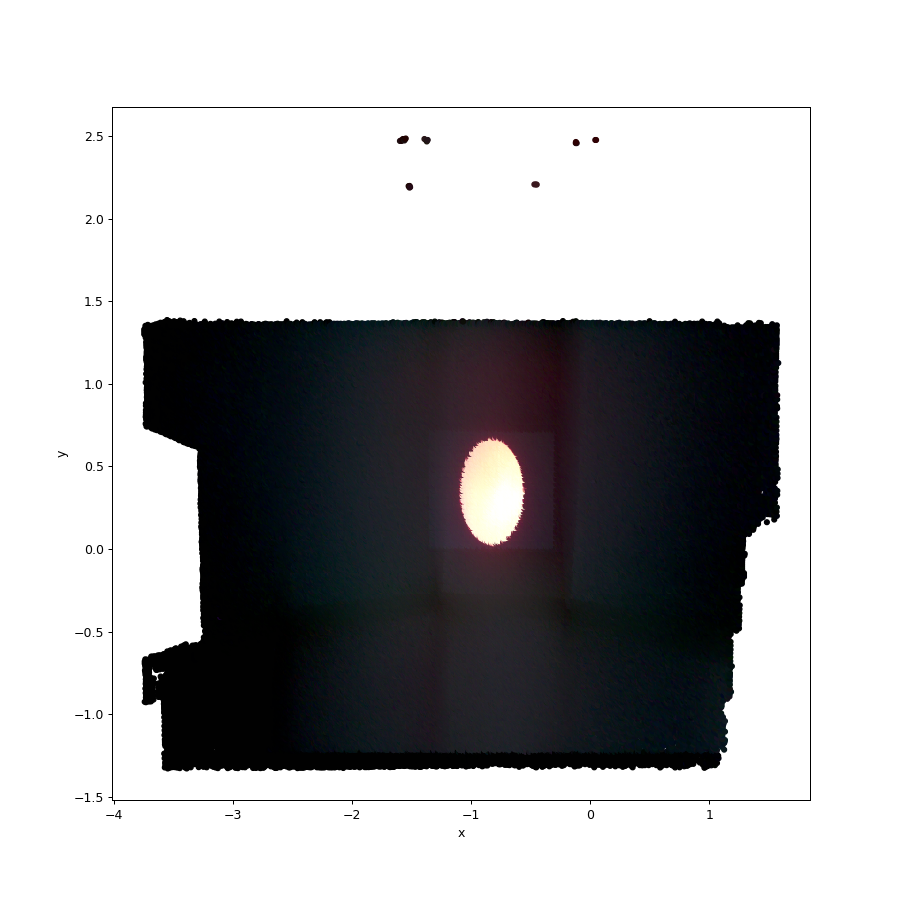

In [104]:
data = pd.read_csv('equation_edit2.csv')

x = data['x']
y = data['y']
z = data['z']
r = data['r']
g = data['g']
b = data['b']

numtest = 170904
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

for i in range(numtest):
    px[i] = x[i]
    py[i] = y[i]
    pz[i] = z[i]
    #pz[i] = 0
    py[i] = 0
    #px[i] = 0
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(px,pz, marker='o', s=15, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.xlim([0,800])
#plt.ylim([0,800])

plt.show()